<a href="https://colab.research.google.com/github/shashwat2820/deep-learning/blob/main/complete_cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
  print("cuda is not available use CPU for training ")
else:
  print("cuda is available use GPU for training training ")



cuda is available use GPU for training training 


In [ ]:
from torchvision import datasets 
import torchvision.transforms as transforms 
from torch.utils.data.sampler import SubsetRandomSampler

#number of subprocesses to be used for data loading 
num_workers = 0

#number of samples per batch 
batch_size = 20

#percentage of the training dataset to be reservered for validation purpose 
valid_size = 0.2

#convert data into a normalised torch.FloatTensor() , data augmentation to make the model moer invariant
transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ToTensor(),
            transforms.Normalize((0.5,0.5,0.5) , (0.5,0.5,0.5))                   
])

#choosing ther training and test datsets

train_data = datasets.CIFAR10('data' , train = True , download = True , transform = transform)
test_data = datasets.CIFAR10('data', train = False , download = True , transform = transform)

# splitytting the training dataset into training and validation data sets
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
#determimg the split parameters
split = int(np.floor(valid_size*num_train))
train_idx , valid_idx = indices[split:] , indices[:split]

# defining samplers for obtainign the training and validation batches 
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)


#defing the train , valid and test dataset loaders (by combining datsets and samplers)
train_loader = torch.utils.data.DataLoader(train_data , batch_size = batch_size , sampler = train_sampler , num_workers = num_workers)
valid_loader = torch.utils.data.DataLoader(train_data , batch_size = batch_size , sampler = valid_sampler , num_workers = num_workers)
test_loader  = torch.utils.data.DataLoader(test_data , batch_size = batch_size , num_workers = num_workers)

classes = ['airplane' , 'automobile' , 'bird' , 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']




Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [ ]:
def imshow(img):
  img= img/2 + 0.5 
  plt.imshow(np.transpose(img,(1,2,0)))

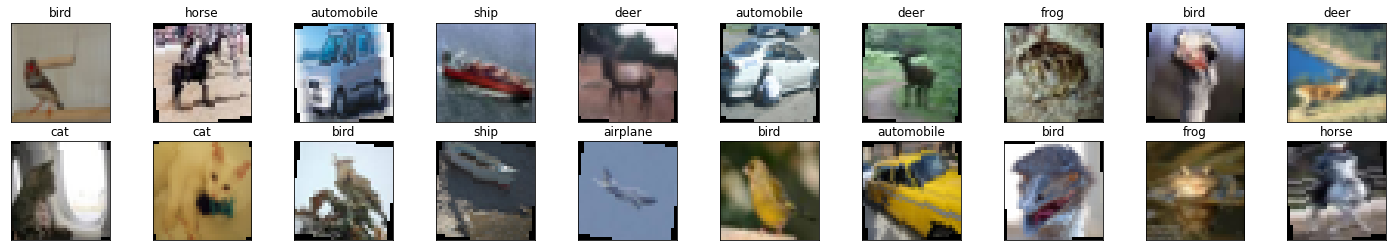

In [ ]:
#obtaining a batch of training images 
dataiter = iter(train_loader)
images , labels = dataiter.next()
images = images.numpy() #converting images to numpy for visualization

#plot the images in the batch with the corresponding labels 
fig = plt.figure(figsize=(25,4))

#visaulising the 20 images in batch
for idx in np.arange(20):
  ax = fig.add_subplot(2 , 20/2 , idx+1 , xticks = [] , yticks = [])
  imshow(images[idx])
  ax.set_title(classes[labels[idx]])

**visaulising a particular image in more detail**


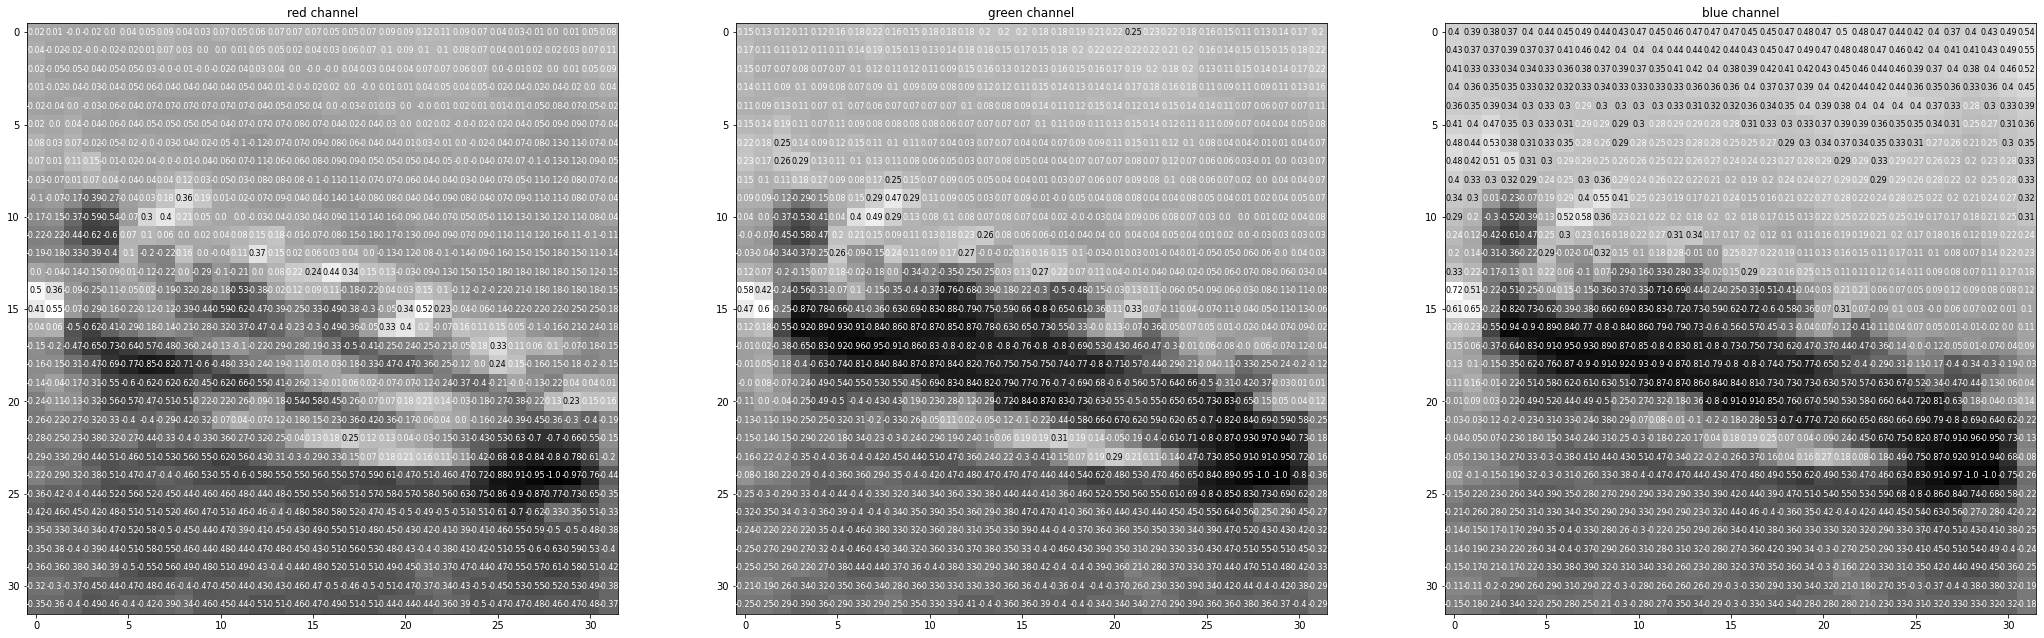

In [ ]:
rgb_img = np.squeeze(images[3])
channels = ['red channel' , 'green channel' , 'blue channel']

fig = plt.figure(figsize = (36,36))
for idx in np.arange(rgb_img.shape[0]):
  ax = fig.add_subplot(1,3,idx + 1)
  img = rgb_img[idx]
  ax.imshow(img , cmap = 'gray')
  ax.set_title(channels[idx])
  width , height = img.shape
  thresh = img.max()/2.5
  for x in range(width):
    for y in  range(height):
      val = round(img[x][y],2) if img[x][y] != 0 else 0 
      ax.annotate(str(val) , xy = (y,x) , horizontalalignment = 'center' , verticalalignment = 'center' , size = 8 , color = 'white' if img[x][y]<thresh else 'black')


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    
    # convolutional layer (sees 32x32x3 image tensor)
    self.conv1 = nn.Conv2d(3 , 16 , 3 , padding = 1)
    # convolutional layer (sees 16x16x16 tensor)
    self.conv2 = nn.Conv2d(16 , 32 , 3 , padding = 1)
    # convolutional layer (sees 8x8x32 tensor)
    self.conv3 = nn.Conv2d(32 , 64 , 3 , padding = 1)
    # max pooling layer
    self.pool = nn.MaxPool2d(2,2)
    # linear layer (64 * 4 * 4 -> 500)
    self.fc1 = nn.Linear(64*4*4 , 500)
    # linear layer (500 -> 10)
    self.fc2 = nn.Linear(500 , 10)
    # dropout layer (p=0.25)
    self.dropout = nn.Dropout(0.25)

  def forward(self , x):
    # add sequence of convolutional and max pooling layers
    x = self.pool(F.relu(self.conv1(x)))

    x = self.pool(F.relu(self.conv2(x)))

    x = self.pool(F.relu(self.conv3(x)))

    # flatten image input
    x = x.view(-1 , 64*4*4)
    # add 1st hidden layer, with relu activation function
    x = self.dropout(x)
    # add dropout layer
    x = F.relu(self.fc1(x))
    # add dropout layer
    x = self.dropout(x)
    # add 2nd hidden layer, with relu activation function
    x = self.fc2(x)

    return x 

# printing the entire summary of the model
model = Net()
print(model)

#gpu check
if train_on_gpu:
  model.cuda()



Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


In [ ]:
import torch.optim as optim 

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters() , lr = 0.01)

In [ ]:

epochs = 30 

valid_loss_min = np.Inf

for epoch in range(1 , epochs + 1):
  
  train_loss = 0.0
  valid_loss = 0.0

  model.train()
  for batch_idx , (data , target) in enumerate(train_loader):
    
    if train_on_gpu:
      data , target = data.cuda() , target.cuda()

    optimizer.zero_grad()

    output = model(data)

    loss = criterion(output , target)

    loss.backward()

    optimizer.step()
    train_loss += loss.item()*data.size(0)



  model.eval()
  for batch_idx , (data,target) in enumerate(valid_loader):

    if train_on_gpu:
      data , target = data.cuda() , target.cuda()

    output = model(data)

    loss = criterion(output , target)

    valid_loss += loss.item()*data.size(0)

  train_loss = train_loss/len(train_loader.sampler)
  valid_loss = valid_loss/len(valid_loader.sampler)
  
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

  if valid_loss <= valid_loss_min:
     print("The validation loss decreased from {:.6f} --> \t {:.6f} ".format(valid_loss_min , valid_loss))
  # saving the model 
  torch.save(model.state_dict() , 'complete_cifar10_cnn.pt')

  valid_loss_min = valid_loss

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	Training Loss: 2.123211 	Validation Loss: 1.913164
The validation loss decreased from inf --> 	 1.913164 
Epoch: 2 	Training Loss: 1.735253 	Validation Loss: 1.558754
The validation loss decreased from 1.913164 --> 	 1.558754 
Epoch: 3 	Training Loss: 1.513775 	Validation Loss: 1.427777
The validation loss decreased from 1.558754 --> 	 1.427777 
Epoch: 4 	Training Loss: 1.398160 	Validation Loss: 1.323010
The validation loss decreased from 1.427777 --> 	 1.323010 
Epoch: 5 	Training Loss: 1.314366 	Validation Loss: 1.239400
The validation loss decreased from 1.323010 --> 	 1.239400 
Epoch: 6 	Training Loss: 1.247772 	Validation Loss: 1.186999
The validation loss decreased from 1.239400 --> 	 1.186999 
Epoch: 7 	Training Loss: 1.188754 	Validation Loss: 1.122545
The validation loss decreased from 1.186999 --> 	 1.122545 
Epoch: 8 	Training Loss: 1.140750 	Validation Loss: 1.122025
The validation loss decreased from 1.122545 --> 	 1.122025 
Epoch: 9 	Training Loss: 1.094501 	Va

**loading the saved model**


In [ ]:
model.load_state_dict(torch.load('complete_cifar10_cnn.pt'))


<All keys matched successfully>

**testing the trained model for testing set images**




In [ ]:
test_loss = 0.0 

#for dividign the test set results amomg the various classes 
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))


model.eval()
for batch_idx , (data,target) in enumerate(test_loader):

  if train_on_gpu:
    data , target = data.cuda() , target.cuda()

  output = model(data)

  loss = criterion(output,target)

  test_loss +=loss.item()*data.size(0)

  _,pred = torch.max(output , 1)

  correct_tensor = pred.eq(target.data.view_as(pred))

  correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())

  for i in range(batch_size):

    label = target.data[i]
    class_correct[label] +=correct[i].item()
    class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('test loss : {:.6f} \n'.format(train_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))



test loss : 0.679081 

Test Accuracy of airplane: 85% (858/1000)
Test Accuracy of automobile: 84% (848/1000)
Test Accuracy of  bird: 62% (621/1000)
Test Accuracy of   cat: 50% (501/1000)
Test Accuracy of  deer: 74% (749/1000)
Test Accuracy of   dog: 61% (614/1000)
Test Accuracy of  frog: 81% (817/1000)
Test Accuracy of horse: 80% (801/1000)
Test Accuracy of  ship: 79% (790/1000)
Test Accuracy of truck: 81% (817/1000)

Test Accuracy (Overall): 74% (7416/10000)


**visualising the test result** 

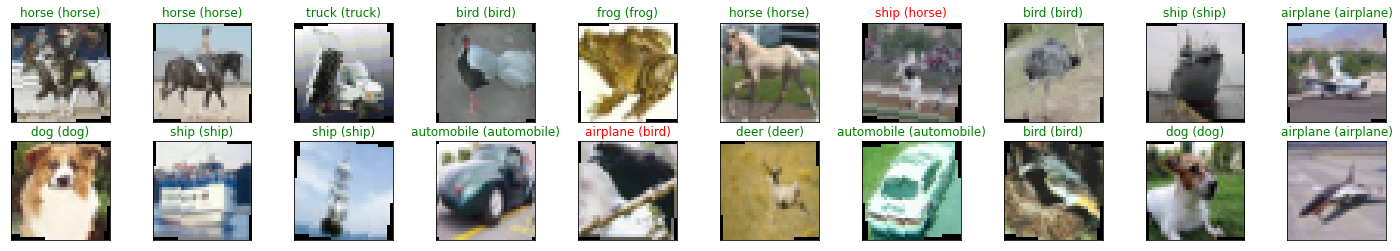

In [ ]:
#obtaining a batch of tetsing images 
dataiter = iter(train_loader)
images , labels = dataiter.next()
images.numpy() #converting images to numpy for visualization

if train_on_gpu:
  images = images.cuda()

output = model(images)

_,preds_tensor =  torch.max(output , 1)

preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

#plot the images in the batch with the corresponding labels 
fig = plt.figure(figsize=(25,4))
#visaulising the 20 images in batch
for idx in np.arange(20):
  ax = fig.add_subplot(2 , 20/2 , idx+1 , xticks = [] , yticks = [])
  imshow(images[idx] if not train_on_gpu else images[idx].cpu())
  ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))